In [1]:
import pymc as pm
import numpy as np
import pymc_experimental as pmx

import matplotlib.pyplot as plt
import arviz as az

%config InlineBackend.figure_format = "retina"
%matplotlib inline

I follow **Example 9** from [here](https://projecteuclid.org/ebooks/nsf-cbms-regional-conference-series-in-probability-and-statistics/Nonparametric-Bayesian-Inference/Chapter/Chapter-3-Dirichlet-Process/10.1214/cbms/1362163748) (displayed below) and attempt to also replicate the results shown in Figure 3.2. They assume that data are drawn i.i.d. from $\mathcal{N}(2, 4)$ but assume a base distribution $G_0 = \mathcal{N}(0, 1)$.

<img src="dp-example-9.png" width=500>

In [2]:
alpha = 5.0  # concentration parameter
K = 19  # truncation parameter

rng = np.random.default_rng(seed=34)
obs = rng.normal(2.0, 2.0, size=50)

In [3]:
with pm.Model() as model:
    alpha = pm.Uniform("alpha", 0.0, 10.0)
    base_dist = pm.Normal("base_dist", 0.0, 1.0, shape=(K + 1,))
    sbw, atoms = pmx.dp.DirichletProcess("dp", alpha, base_dist, K, observed=obs)

    trace = pm.sample(target_accept=0.95)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [alpha, base_dist, sbw]
>BinaryGibbsMetropolis: [idx]
>CategoricalGibbsMetropolis: [atom_selection]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [4]:
x_plot = np.linspace(-4, 8, num=1001)


def plot_dp_posterior(x_plot, trace, chain_id=0, draw_id=list(range(50))):
    atoms_post = trace.posterior["atoms"].values[0]
    sbw_post = trace.posterior["sbw"].values[0]

    ecdf = np.less.outer(atoms_post, x_plot).mean(axis=1)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

    for _draw in draw_id:
        ax.plot(x_plot, ecdf[_draw], c="k", linestyle="-", linewidth=0.5)

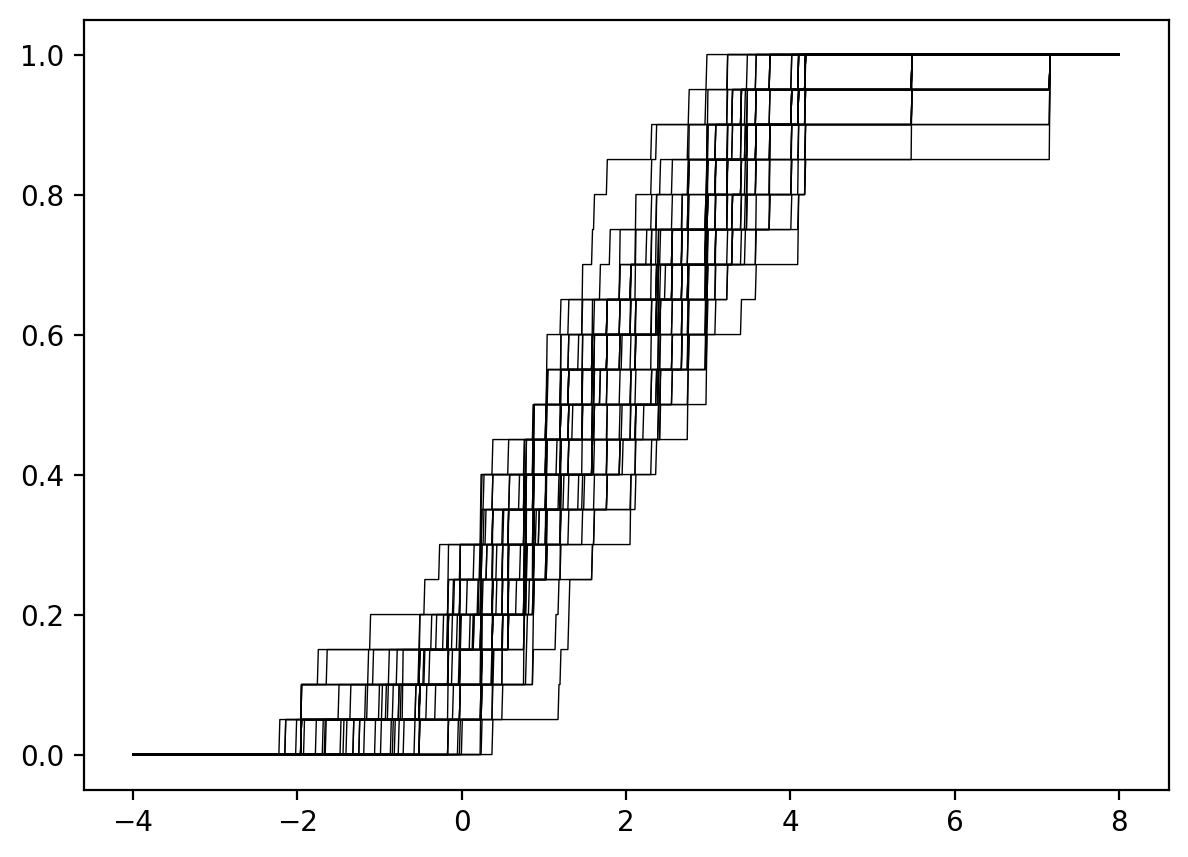

In [5]:
plot_dp_posterior(x_plot, trace)